In [4]:
%matplotlib inline
import xarray as xr
import cftime
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
ds = xr.open_dataset(f"/resstore/b0243/Data/Sporadic_E/WACCM_Input_Data/Solar_Data/spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc", decode_times=False)
ds

<xarray.Dataset>
Dimensions:         (wavelength: 3780, time: 23741, ref_time_bound: 2)
Coordinates:
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
Dimensions without coordinates: time
Data variables:
    band_width      (wavelength) float64 ...
    date            (time) float64 ...
    ssi             (time, wavelength) float64 ...
    ssi_ref         (wavelength) float64 ...
    tsi             (time) float64 ...
    tsi_ref         float64 ...
Attributes:
    notes:                     \nData derived by Judith Lean, jlean@ssd5.nrl....
    scaling:                   \nAbsolute spectral and total irradiance inclu...
    history:                   Tue Jun 23 12:37:10 2015: ncrcat spectral_irra...
    Source_data:               \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    Source_website:            \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    title:                     \nLean daily solar irradiance for 19500101-201...
    creator:                   \nMike Mills, mmills@ucar.edu
    creation_date:             \nWed Feb 27 14:56:27 MST 2013
    nco_openmp_thread_number:  1
    NCO:                       4.4.2

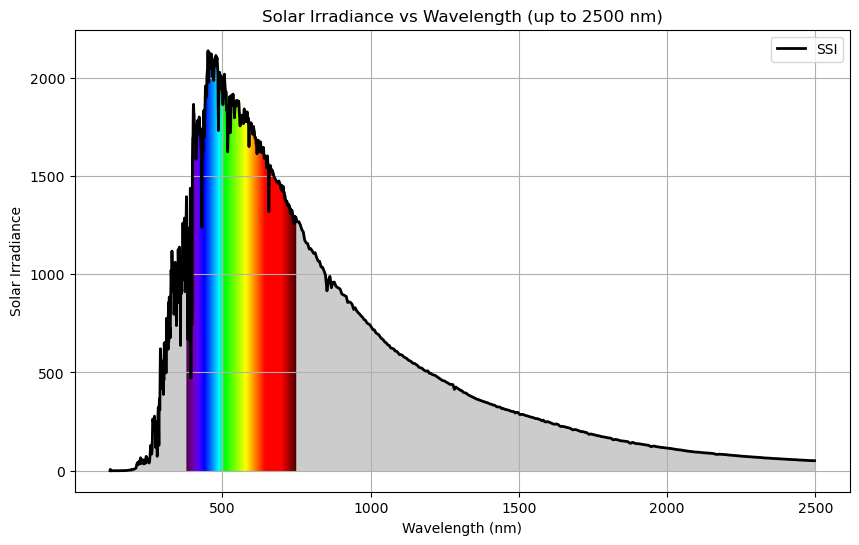

In [3]:
def wavelength_to_rgb(wavelength):
    """
    Convert a wavelength in nm to an approximate RGB color.
    This function works for wavelengths in the visible range (380 nm to 750 nm).
    For wavelengths outside this range, it returns black.
    Returns an (R, G, B) tuple with values in [0, 1].
    """
    if wavelength >= 380 and wavelength <= 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength > 440 and wavelength <= 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif wavelength > 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif wavelength > 510 and wavelength <= 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength > 580 and wavelength <= 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif wavelength > 645 and wavelength <= 750:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R, G, B = 0.0, 0.0, 0.0

    # Intensity adjustment near the boundaries
    if wavelength >= 380 and wavelength <= 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif wavelength > 420 and wavelength <= 700:
        factor = 1.0
    elif wavelength > 700 and wavelength <= 750:
        factor = 0.3 + 0.7 * (750 - wavelength) / (750 - 700)
    else:
        factor = 0.0

    R *= factor
    G *= factor
    B *= factor
    return (R, G, B)

if 'time' in ds['ssi'].dims:
    ssi_slice = ds['ssi'].isel(time=0)
else:
    ssi_slice = ds['ssi']

mask = ds['wavelength'] <= 2500
wavelength_filtered = ds['wavelength'].where(mask, drop=True)
ssi_filtered = ssi_slice.sel(wavelength=wavelength_filtered)


wl = wavelength_filtered.values  
ssi_vals = ssi_filtered.values     

plt.figure(figsize=(10, 6))

plt.plot(wl, ssi_vals, color='black', linewidth=2, label='SSI')

for i in range(len(wl) - 1):
    avg_wl = (wl[i] + wl[i+1]) / 2.0
    if 380 <= avg_wl <= 750:
        color = wavelength_to_rgb(avg_wl)
    else:
        color = (0.8, 0.8, 0.8) 

    # Define the current segment.
    xs = [wl[i], wl[i+1]]
    ys = [ssi_vals[i], ssi_vals[i+1]]
    plt.fill_between(xs, ys, color=color)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance vs Wavelength (up to 2500 nm)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
ds_Smin = xr.open_dataset(f"/nobackup/phydrm/SpE/Smax_spectral_irradiance_cycle22.nc", decode_times=False)
ds_Smin
smin_ssi = ds_Smin.variables['ssi']
smin_tsi = ds_Smin.variables['tsi']

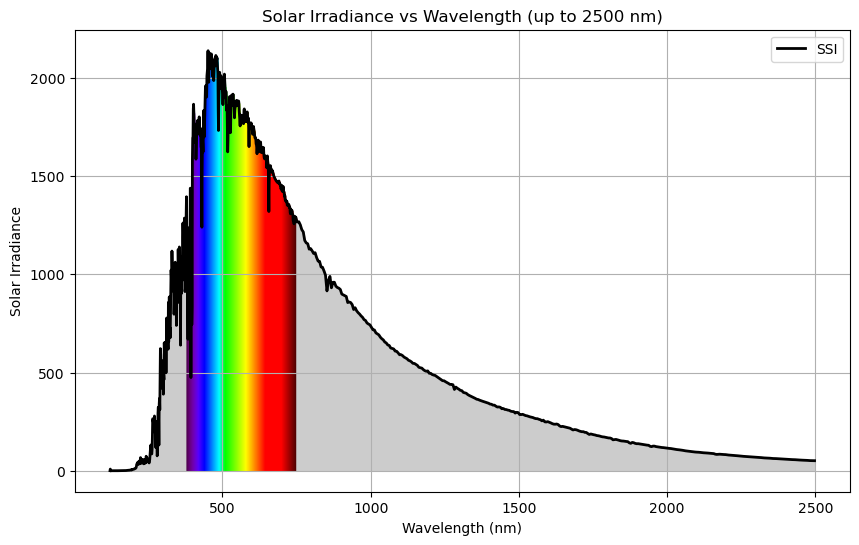

In [9]:
def wavelength_to_rgb(wavelength):
    """
    Convert a wavelength in nm to an approximate RGB color.
    This function works for wavelengths in the visible range (380 nm to 750 nm).
    For wavelengths outside this range, it returns black.
    Returns an (R, G, B) tuple with values in [0, 1].
    """
    if wavelength >= 380 and wavelength <= 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength > 440 and wavelength <= 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif wavelength > 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif wavelength > 510 and wavelength <= 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength > 580 and wavelength <= 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif wavelength > 645 and wavelength <= 750:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R, G, B = 0.0, 0.0, 0.0

    # Intensity adjustment near the boundaries
    if wavelength >= 380 and wavelength <= 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif wavelength > 420 and wavelength <= 700:
        factor = 1.0
    elif wavelength > 700 and wavelength <= 750:
        factor = 0.3 + 0.7 * (750 - wavelength) / (750 - 700)
    else:
        factor = 0.0

    R *= factor
    G *= factor
    B *= factor
    return (R, G, B)

# -------------------------------
# Load your dataset (adjust the file name or method as needed)
# -------------------------------
# ds = xr.open_dataset('your_dataset.nc')

# -------------------------------
# 1. Extract data and select up to 2500 nm
# -------------------------------

# Use a single time slice if the data has a time dimension.
if 'time' in ds_Smin['ssi'].dims:
    ssi_slice = ds_Smin['ssi'].isel(time=0)
else:
    ssi_slice = ds_Smin['ssi']

# Filter the wavelength coordinate for values <= 2500 nm.
mask = ds_Smin['wavelength'] <= 2500
wavelength_filtered = ds_Smin['wavelength'].where(mask, drop=True)
ssi_filtered = ssi_slice.sel(wavelength=wavelength_filtered)

# Convert to NumPy arrays for plotting.
wl = wavelength_filtered.values    # Expected shape: (N,)
ssi_vals = ssi_filtered.values     # Expected shape: (N,)

# -------------------------------
# 2. Create the plot with visible-spectrum colors for filling
# -------------------------------
plt.figure(figsize=(10, 6))

# Plot the solar irradiance curve as a black line.
plt.plot(wl, ssi_vals, color='black', linewidth=2, label='SSI')

# Fill the area under the curve segment-by-segment.
for i in range(len(wl) - 1):
    # Average wavelength for the current segment.
    avg_wl = (wl[i] + wl[i+1]) / 2.0
    # Use the visible spectrum color if within 380-750 nm; otherwise, default to gray.
    if 380 <= avg_wl <= 750:
        color = wavelength_to_rgb(avg_wl)
    else:
        color = (0.8, 0.8, 0.8)  # default gray for wavelengths outside the visible range

    # Define the current segment.
    xs = [wl[i], wl[i+1]]
    ys = [ssi_vals[i], ssi_vals[i+1]]
    plt.fill_between(xs, ys, color=color)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance vs Wavelength (up to 2500 nm)')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
ds_Smax = xr.open_dataset(f"/nobackup/phydrm/SpE/Smax_spectral_irradiance_cycle22.nc", decode_times=False)
ds_Smax
# ds_Smax['ssi'].values[0][0]
smax_ssi = ds_Smax.variables['ssi']
smax_tsi = ds_Smax.variables['tsi']

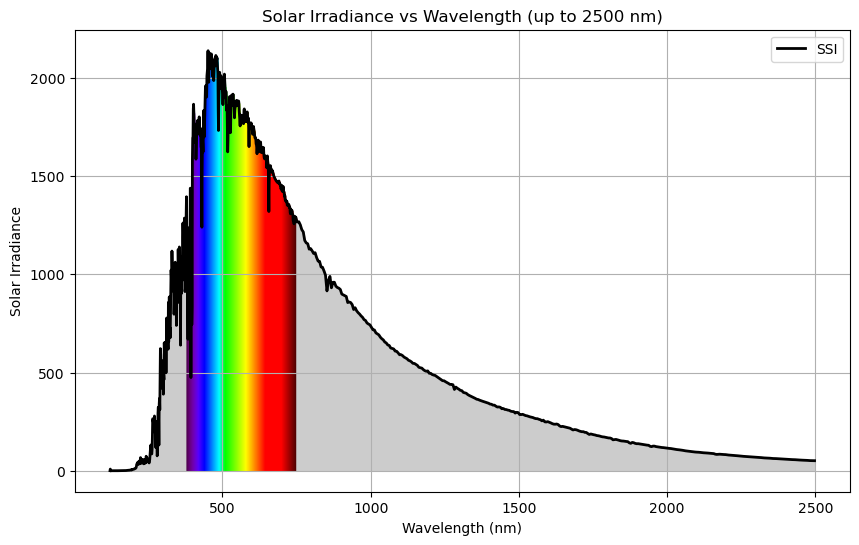

In [42]:
def wavelength_to_rgb(wavelength):
    """
    Convert a wavelength in nm to an approximate RGB color.
    This function works for wavelengths in the visible range (380 nm to 750 nm).
    For wavelengths outside this range, it returns black.
    Returns an (R, G, B) tuple with values in [0, 1].
    """
    if wavelength >= 380 and wavelength <= 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength > 440 and wavelength <= 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif wavelength > 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif wavelength > 510 and wavelength <= 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength > 580 and wavelength <= 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif wavelength > 645 and wavelength <= 750:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R, G, B = 0.0, 0.0, 0.0

    # Intensity adjustment near the boundaries
    if wavelength >= 380 and wavelength <= 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif wavelength > 420 and wavelength <= 700:
        factor = 1.0
    elif wavelength > 700 and wavelength <= 750:
        factor = 0.3 + 0.7 * (750 - wavelength) / (750 - 700)
    else:
        factor = 0.0

    R *= factor
    G *= factor
    B *= factor
    return (R, G, B)

if 'time' in ds_Smax['ssi'].dims:
    ssi_slice = ds_Smax['ssi'].isel(time=1)
else:
    ssi_slice = ds_Smax['ssi']

mask = ds_Smax['wavelength'] <= 2500
wavelength_filtered = ds_Smax['wavelength'].where(mask, drop=True)
ssi_filtered = ssi_slice.sel(wavelength=wavelength_filtered)


wl = wavelength_filtered.values  
ssi_vals = ssi_filtered.values     

plt.figure(figsize=(10, 6))

plt.plot(wl, ssi_vals, color='black', linewidth=2, label='SSI')

for i in range(len(wl) - 1):
    avg_wl = (wl[i] + wl[i+1]) / 2.0
    if 380 <= avg_wl <= 750:
        color = wavelength_to_rgb(avg_wl)
    else:
        color = (0.8, 0.8, 0.8) 

    # Define the current segment.
    xs = [wl[i], wl[i+1]]
    ys = [ssi_vals[i], ssi_vals[i+1]]
    plt.fill_between(xs, ys, color=color)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance vs Wavelength (up to 2500 nm)')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
import numpy as np
from netCDF4 import Dataset
import sys
from typing import Tuple, Dict, List

def compare_netcdf_files(file1_path: str, file2_path: str, rtol: float = 1e-5, atol: float = 1e-8) -> Dict:
    """
    Compare two NetCDF files and return differences in structure and data.
    
    Args:
        file1_path: Path to first NetCDF file
        file2_path: Path to second NetCDF file
        rtol: Relative tolerance for numerical comparisons
        atol: Absolute tolerance for numerical comparisons
    
    Returns:
        Dictionary containing comparison results
    """
    try:
        nc1 = Dataset(file1_path, 'r')
        nc2 = Dataset(file2_path, 'r')
    except Exception as e:
        return {"error": f"Error opening files: {str(e)}"}
    
    differences = {
        "dimensions": [],
        "variables": [],
        "attributes": [],
        "data": []
    }
    
    # Compare dimensions
    dims1 = set(nc1.dimensions.keys())
    dims2 = set(nc2.dimensions.keys())
    
    if dims1 != dims2:
        differences["dimensions"].append({
            "missing_in_file1": list(dims2 - dims1),
            "missing_in_file2": list(dims1 - dims2)
        })
    
    # Compare common dimensions
    for dim in dims1.intersection(dims2):
        if nc1.dimensions[dim].size != nc2.dimensions[dim].size:
            differences["dimensions"].append({
                "dimension": dim,
                "size_file1": nc1.dimensions[dim].size,
                "size_file2": nc2.dimensions[dim].size
            })
    
    # Compare variables
    vars1 = set(nc1.variables.keys())
    vars2 = set(nc2.variables.keys())
    
    if vars1 != vars2:
        differences["variables"].append({
            "missing_in_file1": list(vars2 - vars1),
            "missing_in_file2": list(vars1 - vars2)
        })
    
    # Compare common variables
    for var in vars1.intersection(vars2):
        var1 = nc1.variables[var]
        var2 = nc2.variables[var]
        
        # Compare variable attributes
        attrs1 = set(var1.ncattrs())
        attrs2 = set(var2.ncattrs())
        
        if attrs1 != attrs2:
            differences["attributes"].append({
                "variable": var,
                "missing_in_file1": list(attrs2 - attrs1),
                "missing_in_file2": list(attrs1 - attrs2)
            })
        
        # Compare data values
        try:
            data1 = var1[:]
            data2 = var2[:]
            
            if not np.allclose(data1, data2, rtol=rtol, atol=atol):
                # Calculate basic statistics of differences
                diff = data1 - data2
                differences["data"].append({
                    "variable": var,
                    "max_diff": float(np.max(np.abs(diff))),
                    "mean_diff": float(np.mean(np.abs(diff))),
                    "std_diff": float(np.std(diff)),
                    "num_different_elements": int(np.sum(~np.isclose(data1, data2, rtol=rtol, atol=atol)))
                })
        except Exception as e:
            differences["data"].append({
                "variable": var,
                "error": f"Error comparing data: {str(e)}"
            })
    
    nc1.close()
    nc2.close()
    
    return differences

def print_comparison_results(results: Dict) -> None:
    """
    Print the comparison results in a readable format.
    
    Args:
        results: Dictionary containing comparison results
    """
    if "error" in results:
        print(f"Error: {results['error']}")
        return
    
    print("NetCDF File Comparison Results")
    print("==============================")
    
    # Print dimension differences
    if results["dimensions"]:
        print("\nDimension Differences:")
        for diff in results["dimensions"]:
            if "missing_in_file1" in diff:
                print(f"  Missing in file 1: {diff['missing_in_file1']}")
                print(f"  Missing in file 2: {diff['missing_in_file2']}")
            else:
                print(f"  Dimension '{diff['dimension']}' size mismatch:")
                print(f"    File 1: {diff['size_file1']}")
                print(f"    File 2: {diff['size_file2']}")
    
    # Print variable differences
    if results["variables"]:
        print("\nVariable Differences:")
        for diff in results["variables"]:
            print(f"  Missing in file 1: {diff['missing_in_file1']}")
            print(f"  Missing in file 2: {diff['missing_in_file2']}")
    
    # Print attribute differences
    if results["attributes"]:
        print("\nAttribute Differences:")
        for diff in results["attributes"]:
            print(f"  Variable: {diff['variable']}")
            print(f"    Missing in file 1: {diff['missing_in_file1']}")
            print(f"    Missing in file 2: {diff['missing_in_file2']}")
    
    # Print data differences
    if results["data"]:
        print("\nData Differences:")
        for diff in results["data"]:
            if "error" in diff:
                print(f"  Error comparing {diff['variable']}: {diff['error']}")
            else:
                print(f"  Variable: {diff['variable']}")
                print(f"    Maximum absolute difference: {diff['max_diff']}")
                print(f"    Mean absolute difference: {diff['mean_diff']}")
                print(f"    Standard deviation of differences: {diff['std_diff']}")
                print(f"    Number of different elements: {diff['num_different_elements']}")

# Example usage
if __name__ == "__main__":
    if len(sys.argv) != 3:
        print("Usage: python compare_netcdf.py file1.nc file2.nc")
        sys.exit(1)
    
    results = compare_netcdf_files(f'/nobackup/phydrm/SpE/Smin_spectral_irradiance_cycle21.nc',f'/nobackup/phydrm/SpE/Smax_spectral_irradiance_cycle22.nc')
    print_comparison_results(results)

NetCDF File Comparison Results

Data Differences:
  Variable: ssi
    Maximum absolute difference: 7.7726999999998725
    Mean absolute difference: 0.2724762051637813
    Standard deviation of differences: 0.7046740215198701
    Number of different elements: 7546
  Variable: tsi
    Maximum absolute difference: 1.2457221895062958
    Mean absolute difference: 1.2457221895062958
    Standard deviation of differences: 0.0
    Number of different elements: 2


In [10]:
smax_ssi

<xarray.Variable (time: 2, wavelength: 3780)>
[7560 values with dtype=float64]
Attributes:
    units:      mW/m^2/nm
    long_name:  Solar Spectral Irradiance at 1 a.u.

/tmp/ipykernel_241062/1361273806.py:90: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100)


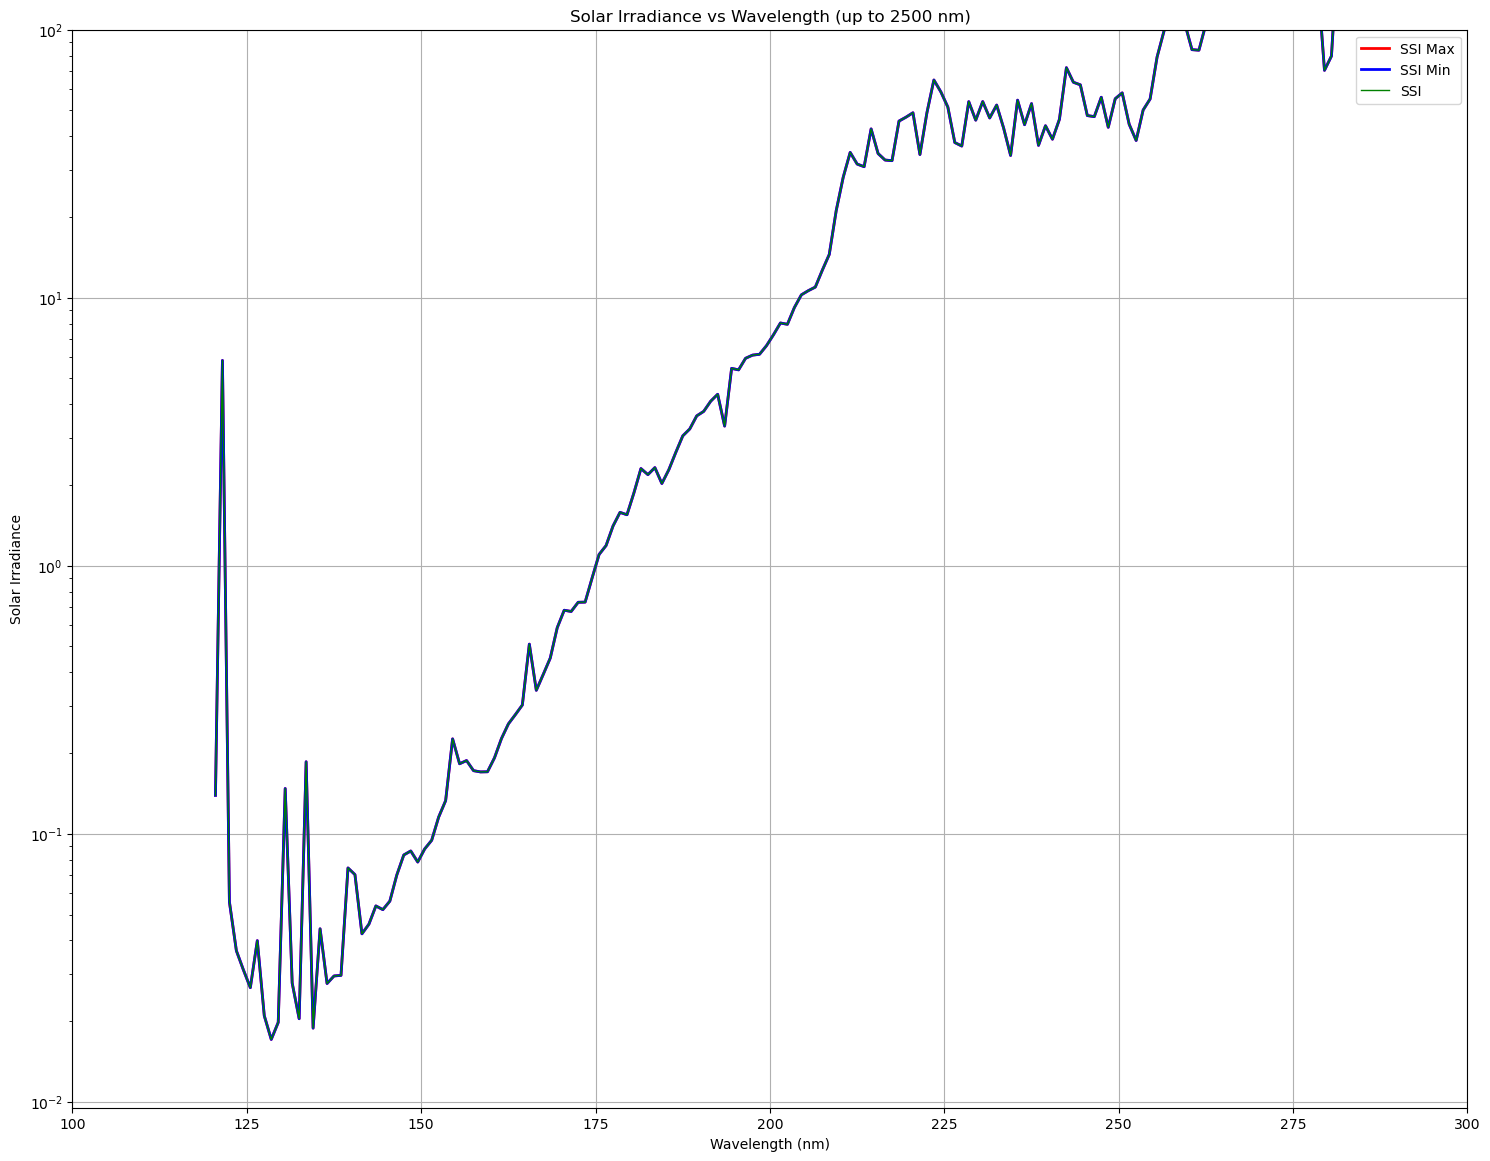

In [49]:
def wavelength_to_rgb(wavelength):
    """
    Convert a wavelength in nm to an approximate RGB color.
    This function works for wavelengths in the visible range (380 nm to 750 nm).
    For wavelengths outside this range, it returns black.
    Returns an (R, G, B) tuple with values in [0, 1].
    """
    if wavelength >= 380 and wavelength <= 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength > 440 and wavelength <= 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif wavelength > 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif wavelength > 510 and wavelength <= 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength > 580 and wavelength <= 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif wavelength > 645 and wavelength <= 750:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R, G, B = 0.0, 0.0, 0.0

    # Intensity adjustment near the boundaries
    if wavelength >= 380 and wavelength <= 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif wavelength > 420 and wavelength <= 700:
        factor = 1.0
    elif wavelength > 700 and wavelength <= 750:
        factor = 0.3 + 0.7 * (750 - wavelength) / (750 - 700)
    else:
        factor = 0.0

    R *= factor
    G *= factor
    B *= factor
    return (R, G, B)


if 'time' in ds_Smax['ssi_ref'].dims:
   ssi_max = ds_Smax['ssi_ref'].isel(time=1)
   ssi_min = ds_Smin['ssi_red'].isel(time=1)
   ssi = ds['ssi_ref'].isel(time=1)
else:
   ssi_max = ds_Smax['ssi_ref']
   ssi_min = ds_Smin['ssi_ref']
   ssi = ds['ssi_ref']

mask = ds_Smax['wavelength'] <= 2500
wavelength_filtered = ds_Smax['wavelength'].where(mask, drop=True)
ssi_max_filtered = ssi_max.sel(wavelength=wavelength_filtered)
ssi_min_filtered = ssi_min.sel(wavelength=wavelength_filtered)
ssi_filtered = ssi.sel(wavelength=wavelength_filtered)

wl = wavelength_filtered.values  
ssi_max_vals = ssi_max_filtered.values
ssi_min_vals = ssi_min_filtered.values
ssi_vals = ssi_filtered.values


plt.figure(figsize=(18, 14))
plt.yscale('log')
plt.plot(wl, ssi_max_vals, color='red', linewidth=2, label='SSI Max')
plt.plot(wl, ssi_min_vals, color='blue', linewidth=2, label='SSI Min')
plt.plot(wl, ssi_vals, color='green', linewidth=1, label='SSI')

# plt.plot(wl, (ssi_max_vals - ssi_vals)/ssi_vals * 100, label='Max % diff', color='red')
# plt.plot(wl, (ssi_min_vals - ssi_vals)/ssi_vals * 100, label='Min % diff', color='blue')

# for i in range(len(wl) - 1):
#    avg_wl = (wl[i] + wl[i+1]) / 2.0
#    if 380 <= avg_wl <= 750:
#        color = wavelength_to_rgb(avg_wl)
#        xs = [wl[i], wl[i+1]]
#        ys_max = [ssi_max_vals[i], ssi_max_vals[i+1]]
#        ys_min = [ssi_min_vals[i], ssi_min_vals[i+1]]
#        plt.fill_between(xs, ys_max, ys_min, color=color, alpha=0.3)
plt.xlim(100, 300)
plt.ylim(0, 100)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance vs Wavelength (up to 2500 nm)')
plt.grid(True)
plt.legend()
plt.show()



In [48]:
def wavelength_to_rgb(wavelength):
    """
    Convert a wavelength in nm to an approximate RGB color.
    This function works for wavelengths in the visible range (380 nm to 750 nm).
    For wavelengths outside this range, it returns black.
    Returns an (R, G, B) tuple with values in [0, 1].
    """
    if wavelength >= 380 and wavelength <= 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength > 440 and wavelength <= 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif wavelength > 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif wavelength > 510 and wavelength <= 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength > 580 and wavelength <= 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif wavelength > 645 and wavelength <= 750:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R, G, B = 0.0, 0.0, 0.0

    # Intensity adjustment near the boundaries
    if wavelength >= 380 and wavelength <= 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif wavelength > 420 and wavelength <= 700:
        factor = 1.0
    elif wavelength > 700 and wavelength <= 750:
        factor = 0.3 + 0.7 * (750 - wavelength) / (750 - 700)
    else:
        factor = 0.0

    R *= factor
    G *= factor
    B *= factor
    return (R, G, B)


if 'time' in ds_Smax['tsi_ref'].dims:
   ssi_max = ds_Smax['tsi_ref'].isel(time=1)
   ssi_min = ds_Smin['tsi_red'].isel(time=1)
   ssi = ds['tsi_ref'].isel(time=1)
else:
   ssi_max = ds_Smax['tsi_ref']
   ssi_min = ds_Smin['tsi_ref']
   ssi = ds['tsi_ref']

mask = ds_Smax['wavelength'] <= 2500
wavelength_filtered = ds_Smax['wavelength'].where(mask, drop=True)
ssi_max_filtered = ssi_max.sel(wavelength=wavelength_filtered)
ssi_min_filtered = ssi_min.sel(wavelength=wavelength_filtered)
ssi_filtered = ssi.sel(wavelength=wavelength_filtered)

wl = wavelength_filtered.values  
ssi_max_vals = ssi_max_filtered.values
ssi_min_vals = ssi_min_filtered.values
ssi_vals = ssi_filtered.values


plt.figure(figsize=(18, 14))
plt.yscale('log')
plt.plot(wl, ssi_max_vals, color='red', linewidth=2, label='TSI Max', marker='o')
plt.plot(wl, ssi_min_vals, color='blue', linewidth=2, label='TSI Min', marker='o')
# plt.plot(wl, ssi_vals, color='green', linewidth=1, label='SSI')

# plt.plot(wl, (ssi_max_vals - ssi_vals)/ssi_vals * 100, label='Max % diff', color='red')
# plt.plot(wl, (ssi_min_vals - ssi_vals)/ssi_vals * 100, label='Min % diff', color='blue')

# for i in range(len(wl) - 1):
#    avg_wl = (wl[i] + wl[i+1]) / 2.0
#    if 380 <= avg_wl <= 750:
#        color = wavelength_to_rgb(avg_wl)
#        xs = [wl[i], wl[i+1]]
#        ys_max = [ssi_max_vals[i], ssi_max_vals[i+1]]
#        ys_min = [ssi_min_vals[i], ssi_min_vals[i+1]]
#        plt.fill_between(xs, ys_max, ys_min, color=color, alpha=0.3)
plt.xlim(100, 300)
plt.ylim(0, 100)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance vs Wavelength (up to 2500 nm)')
plt.grid(True)
plt.legend()
plt.show()



KeyError: "'wavelength' is not a valid dimension or coordinate"